In [1]:
import pickle as pkl
from scipy import optimize, sparse
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq, inv
import scipy as sp
from scipy import sparse

**Problem 1**

In [2]:
#data = np.loadtxt('data (1).txt', dtype = int, usecols = (0,1,2,3)) #, usecols = (0,1,2,3), unpack=True
data1 = np.loadtxt('data (1).txt', dtype = int, usecols = (0,1,2,3), unpack=True)
#print(data)
print(data1.shape)


x1 = np.linspace(0,300,300)

(4, 20)


In [3]:

def leastsquares(xdata,ydata, w):
    x = np.asarray(xdata, dtype=float) 
    y = np.asarray(ydata, dtype=float) 
    w=np.asarray(w, dtype=float)
    order = 2
    # set up least squares equation for powers of x
    lhs = np.vander(x, order)
    rhs = y
     # apply weighting
    lhs *= w[:, np.newaxis]
    rhs *= w  

    # scale lhs to improve condition number and solve
    scale = np.sqrt((lhs*lhs).sum(axis=0))
    lhs =lhs / scale
    c, resids, rank, s = lstsq(lhs, rhs, rcond=None)
    c = (c.T/scale).T  # broadcast scale coefficients
    Vbase = (inv(np.dot(lhs.T, lhs)))/(np.outer(scale, scale))
    fac = resids / (len(x) - order)
    V=Vbase*fac
    um,ub =(np.sqrt(np.diag(V)))
    return(c, um, ub)

In [4]:
x1data=data1[0][4:]
y1data=data1[1][4:]
sigy1data=data1[2][4:]
print(sigy1data.shape)

ans=leastsquares(x1data, y1data, 1/sigy1data)

c1=ans[0]
um=ans[1]
ub=ans[2]
print(c1,um,ub)

m1=c1[0]
b1=c1[1]

x2data=data1[0][:]
y2data=data1[1][:]
sigy2data=data1[2][:]
#ans=leastsquares(x2data, y2data,sigy2data)

(16,)
[ 2.23992083 34.04772776] 0.12450117990206237 21.07681615343423


In [5]:

def eigsorted(cov):
    '''
    Eigenvalues and eigenvectors of the covariance matrix.
    '''
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:, order]


def cov_ellipse(x,y, cov, nstd):
    """
    Source: http://stackoverflow.com/a/12321306/1391441
    """

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)

    return width, height, theta



In [6]:
import numpy as np
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


def main(x, y, sigy, title):
    """
    Generate an `nstd` sigma ellipse based on the mean and covariance of a
    point "cloud".
    """

    # The 2x2 covariance matrix to base the ellipse on.
    cov = np.cov(x,y)
    
    ax = plt.gca()

    # Location of the center of the ellipse.
    mean = [np.mean(x),np.mean(y)]
    # 1 sigma
    width1, height1, theta1 = cov_ellipse(x,y, cov, 1)
    print("1 sigma ellipse for", title, ": \n mean [x,y]", mean, "width", width1, "height", height1, "theta", theta1)
    #2 sigma
    width2, height2, theta2 = cov_ellipse(x,y, cov, 2)
    # First ellipse
    ellipse1 = Ellipse(xy=mean, width=width1, height=height1, angle=theta1, 
                       edgecolor='b', fc='None', lw=2, zorder=4, label="1 sigma")
    ax.add_patch(ellipse1)
    ellipse2 = Ellipse(xy=mean, width=width2, height=height2, angle=theta2, 
                       edgecolor='c', fc='None', lw=2, zorder=4, label= "2 sigma")
    ax.add_patch(ellipse2)
    plt.scatter(x, y, c='k')
    
    ans=leastsquares(x, y, 1/sigy)

    c1=ans[0]
    um=ans[1]
    ub=ans[2]
    m1=c1[0]
    b1=c1[1]
    
    plt.plot(x1, m1*x1+b1, "-r", label='y= '+str(round(m1, 2))+'x + '+str(round(b1, 2)))  
    plt.scatter(x, y)
    plt.errorbar(x,y,yerr=sigy, ls='none') 
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

1 sigma ellipse for HW 1 Points 5:20 : 
 mean [x,y] [167.75, 400.6875] width 206.07480266326576 height 23.482455308082052 theta 67.51532821548778


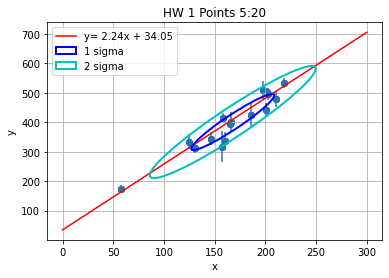

1 sigma ellipse for HW1 Points 1:20 : 
 mean [x,y] [173.15, 419.45] width 209.66151872892658 height 103.06382889956039 theta 75.64045190931662


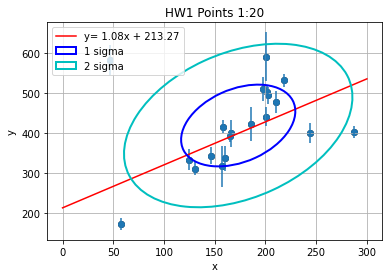

In [7]:
   
plt.show(main(x1data, y1data, sigy1data, "HW 1 Points 5:20"))
plt.show(main(x2data, y2data, sigy2data, "HW1 Points 1:20"))


The one sigma uncertainty ellipse is certainly larger in the case that includes outlier points. It is expecially vertically fatter, since the outlier points are really outliers in the y direction. In fact, the point at around (60, 190) could be considered an outlier if we were looking for outliers in the x direction. 

It also looks fairly accurate, since the one sigma ellipse should include 68% of data points and the two sigma ellipse should include 95% of data points, 
1 sigma includes 10/15ish and 14/20ish respectively, allowing for errorbars to count as 'in'
2 sigma includes 14/15 and 18/20, respectively

**Problem 2**

In [8]:
# Dear all: Get this pickle file from the discord server!

with open("C:/Users/jessm/Documents/NYU/2nd Year/Data Analysis/data2.pkl", "rb") as handle:
    data = pkl.load(handle).T # check out that pesky little `.T`
print(data.shape)

# Dear all:
# - data[0] is the array of times (day units, say?)
# - data[1] is the array of uncertainties (m/s units, say?)

t=data[0]
sigma=data[1]

(13, 1024)


In [9]:
#fixed 100 day period

def guess100(T, DC, A1, A2):
    parenthesis= 2*np.pi*(T/100)
    return DC+(A1*np.sin(parenthesis))+(A2*np.cos(parenthesis))

def negloglike100(params):
    for i in zip(y, t, sigma):
        return np.sum((y - (guess100(t, *params)))**2/(sigma**2))

def guessextra(T, T0_B, DC, B1, B2):
    parenthesis= 2*np.pi*(T/T0_B)
    return DC+(B2*np.sin(parenthesis))+(B2*np.cos(parenthesis))

def negloglikeextra(params):
    for i in zip(y, t, sigma):
        return np.sum((y - (guessextra(t, *params)))**2/(sigma**2))

      fun: 4192.341882120344
 hess_inv: array([[2.74655974e-06, 6.54676114e-06, 7.06248102e-07],
       [6.54676114e-06, 3.54242271e-04, 2.95805623e-05],
       [7.06248102e-07, 2.95805623e-05, 9.70196023e-05]])
      jac: array([0.00000000e+00, 6.10351562e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 96
      nit: 8
     njev: 24
   status: 2
  success: False
        x: array([0.03377263, 2.3140514 , 2.06095442])
[2.10361045 2.18777027 2.31038582 ... 2.72156329 2.63586151 2.52328978]
offset = 0.03377262711669915 amplitude 1 = 2.314051404725436 amplitude 2 = 2.0609544239058177
Final Amplitude = 3.0987686330426034


Text(0.5, 1.0, 'data set 11')

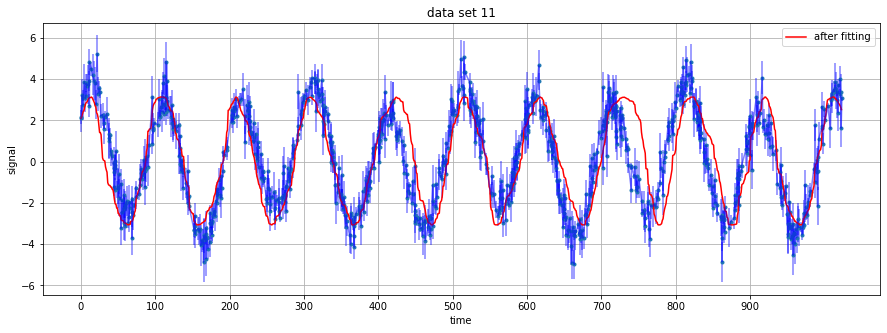

In [10]:
y=data[-1]
params100= [0, 1, 1]

model = optimize.minimize(negloglike100, params100)
print(model)
y_fit = guess100(t, *model['x'][:])
print(y_fit)
print("offset =", model['x'][0], "amplitude 1 =", model['x'][1], "amplitude 2 =", model['x'][2])
print("Final Amplitude =", np.sqrt((model['x'][1])**2+((model['x'][2])**2)))
#plt.plot(y_fit, 'r', label='after fitting for third signal')


plt.figure(figsize=(15, 5))
plt.plot(t, y, '.')
plt.errorbar(t, y, yerr=sigma,
                 color="b", alpha=0.5)
plt.plot(y_fit, color="r", label='after fitting')
plt.legend()


plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 11")


curve 2 for number 11 frequency = 253.44135441822303 offset = 0.14505709848097884 amplitude 1 = 1.0 amplitude 2 = 0.8399579894115
offset = 0.03377262711669915 amplitude 1 = 2.314051404725436 amplitude 2 = 2.0609544239058177


Text(0.5, 1.0, 'data set 11')

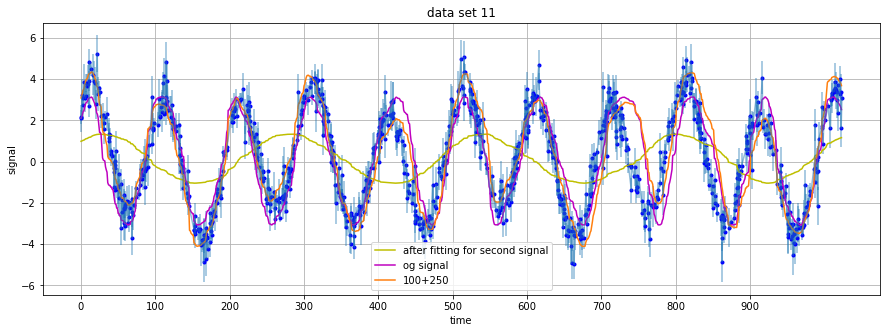

In [11]:
##### 11 #####
y=data[12]
params_new = [250,0, 1, 1]

model_ex1111 = optimize.minimize(negloglikeextra, params_new)
y_first_guess_ex= guessextra(t, *params_new)
y_fit_ex250 = guessextra(t, *model_ex1111['x'][:])
print("curve 2 for number 11", "frequency =", model_ex1111['x'][0], "offset =", model_ex1111['x'][1], "amplitude 1 =", model_ex1111['x'][2], "amplitude 2 =", model_ex1111['x'][3])

plt.figure(figsize=(15, 5))
plt.plot(t, y, '.', color='b')
plt.errorbar(t, y, yerr=sigma, alpha=0.5)
plt.plot(y_fit_ex250, 'y', label='after fitting for second signal')

lik_model100 = optimize.minimize(negloglike100, params100)
y_first_guess100= guess100(t, *params100)
y_fit100 = guess100(t, *lik_model100['x'][:])
print("offset =", lik_model100['x'][0], "amplitude 1 =", lik_model100['x'][1], "amplitude 2 =", lik_model100['x'][2])
plt.plot(y_fit100, 'm', label='og signal')


#params_new = [150,0, 1, 1]

#model_ex = optimize.minimize(negloglikeextra, params_new)
#y_first_guess_ex= guessextra(t, *params_new)
#y_fit_ex150 = guessextra(t, *model_ex['x'][:])
#print("frequency =", model_ex['x'][0], "offset =", model_ex['x'][1], "amplitude 1 =", model_ex['x'][2], "amplitude 2 =", model_ex['x'][3])
#plt.plot(y_fit_ex150, 'r', label='after fitting for third signal')

plt.xticks(np.arange(0, 1000, 100))
plt.grid()

#plt.plot(y_fit100+y_fit_ex150, label="100+150")
plt.plot(y_fit100+y_fit_ex250, label = '100+250')

plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 11")

In [12]:
p1vals = np.linspace(250, 260, 41)
fitresults = []
chi=[]
periods =[]

def guess_period(T, P):
    parenthesis= 2*np.pi*(T/P)
    return 0.14505709848097884+( 0.8399579894115*np.sin(parenthesis))+( 0.8399579894115*np.cos(parenthesis))

def negloglike_p(period):
    for i in zip(y, t, sigma):
        return np.sum((y - (guess_period(t, *period)))**2/(sigma**2))
# Loop over the values in `p1vals`
for p1 in p1vals:
    model_loop = optimize.minimize(negloglike_p, [p1])
    periods.append(model_loop['x'][0])
    y_fit = guess_period(t, model_loop['x'][0])
    chisq=np.divide((np.subtract(y_fit, y)**2), y)
    #print(y_fit.shape)
    #print(chisq.shape)
    fitresults.append(y_fit)
    chi.append(np.sum(chisq))
print(len(chi))
#plt.plot(chi)
print("Periods after fitting: ", periods)

41
Periods after fitting:  [253.44134217386673, 253.44135117158638, 253.44135080379255, 253.44134624229855, 253.4413492462725, 253.44134952412927, 253.44135111903367, 253.44134832003147, 253.44134793296658, 253.44134386484322, 253.44134897610243, 253.44134404640707, 253.4413480883387, 253.44135413580855, 253.4413498399235, 253.44135109994863, 253.44134825743544, 253.44134380939846, 253.4413482088146, 253.441352444748, 253.44134814963044, 253.4413466649835, 253.44134570799534, 253.44134775420804, 253.44134773723016, 253.44134973951031, 253.4413436237862, 253.4413518016093, 253.44134787391403, 253.44134829287106, 253.4413460367797, 253.44134778026137, 253.44134883696395, 253.44134825818486, 253.44134851164276, 253.44134615284636, 253.4413433737926, 253.44134895208575, 253.44134313426454, 253.4413431618572, 253.44134668030765]


[]

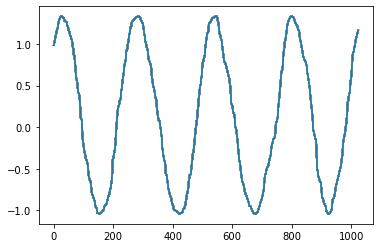

In [13]:
for i in range(0, len(fitresults)):
    plt.plot(fitresults[i])
plt.plot()
#print(len(fitresults))
#print(fitresults)

standard error = standard deviation/ sqrt(n)

In [14]:
import statistics
stdevp=statistics.stdev(periods)
st_err_p= stdevp/np.sqrt(len(periods)) 
print("The standard error on the period of the second signal of curve 11 on HW2:", st_err_p)

The standard error on the period of the second signal of curve 11 on HW2: 4.3557311997689857e-07


Problem 2: In your scientific programming language of choice, write a very simple MH MCMC sampler. Sample in a single parameter x and give the sampler as its density
function p(x) a Gaussian density with mean 2 and variance 2. (Note that variance
is the square of the standard deviation.) Give the sampler a proposal distribution
q(x'| x) a Gaussian pdf for x' with mean x and variance 1. Initialize the sampler with
x = 0 and run the sampler for more than 10^4
steps. Plot the results as a histogram,
with the true density over-plotted sensibly.

Problem 4: Re-do Problem 2 but now with an input density that is a function of
two variables (x, y). For the density function use two different functions. (a) The
first density function is a covariant two-dimensional Gaussian density with variance
tensor
V =

2.0 1.2
1.2 2.0


Problem 10: Re-do Problem 2 but now look at convergence: Plot the x chain as
a function of timestep. Also split the chain into four contiguous segments (the first,
second, third, and fourth quarters of the chain). In each of these four, compute the
empirical mean and empirical variance of x. What do you conclude about convergence
from these heuristics?


## Problem 3

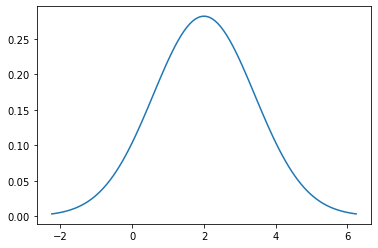

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 2 #mean
variance = 2
sigma = math.sqrt(variance)
x_plt = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)


plt.plot(x_plt, stats.norm.pdf(x_plt, mu, sigma))
plt.show()


In [16]:
class MH_MCMC:
    def __init__(self, f, q, init_x=0):
        self.f = f
        self.q = q
        self.x = init_x #starting it with x=0
        
    def sample(self, draws):
        return np.array([self.selection() for _ in range(draws)])
    
    def proposal(self):
        return self.q(self.x)
    
    def selection(self):
        q = self.proposal()
        r = np.random.uniform(0,1)

        if (self.f(q)/self.f(self.x) > r):
            self.x = q 
            
        return self.x


real_dist = stats.norm(2,np.sqrt(2))

MC = MH_MCMC(real_dist.pdf, lambda x: stats.norm.rvs(loc=x, scale=1))

hops = 80000
results = MC.sample(hops)

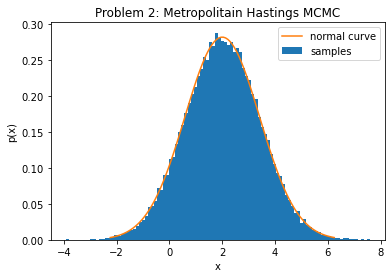

In [17]:
plt.hist(results, bins=100, density=True, label="samples")
plt.plot(x_plt, stats.norm.pdf(x_plt, mu, sigma), label="normal curve")
plt.title("Problem 2: Metropolitain Hastings MCMC")
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()

## Problem 4

In [18]:
def plots3(samples, title):   
        fig, ax = plt.subplots(2,2)
        fig.tight_layout(pad=2.0)
        ax[0,1].axis('off')
        
        ax[0,0].hist(samples.T[0], bins=1_000, density=True)
        ax[1,1].hist(samples.T[1], bins=1_000, density=True)
        ax[1,0].scatter(samples.T[0], samples.T[1], 
                             edgecolors='k', facecolors='none', s=40, linewidths=1)

        ax[0,0].set_xlabel('x')
        ax[0,0].set_ylabel('p(x)')

        ax[1,1].set_xlabel('y')
        ax[1,1].set_ylabel('p(y)')

        ax[1,0].set_xlabel('x')
        ax[1,0].set_ylabel('y')
        fig.suptitle(title)

In [19]:
V=np.array([[2.0, 1.2],[1.2, 2.0]])
print(V.shape)

real_dist2d = stats.multivariate_normal(mean=np.array([2,2]), cov=V)
   
MC2d = MH_MCMC(real_dist2d.pdf, lambda x: stats.multivariate_normal.rvs(mean=np.array([0,0]), cov=np.array([[1,0],[0,1]])))
results2d = MC2d.sample(hops)

(2, 2)


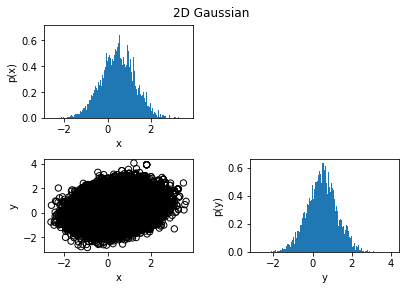

In [20]:
plots3(results2d, "2D Gaussian")

In [21]:
class MH_MCMC_hat:
    def __init__(self, f, q, init_x=[4,4]):
        self.f = f
        self.q = q
        self.x = init_x #starting it with x=0
        
    def sample(self, draws):
        return np.array([self.selection() for _ in range(draws)])
    
    def proposal(self):
        return self.q(self.x)
    
    def selection(self):
        q = self.proposal()
        r = np.random.uniform(0,1)

        if (self.f(q)/self.f(self.x) > r):
            self.x = q 
            
        return self.x


one dimensional tophat

def top1d(x):   
    if (3<x<7):
        return 1
    else:
        return 0
    
real_hat=top1d   
MChat = MH_MCMC(real_hat, lambda x: stats.norm.rvs(loc=x, scale=1))
sampleshat = MChat.sample(hops)


plt.hist(sampleshat, bins=100, density=True)


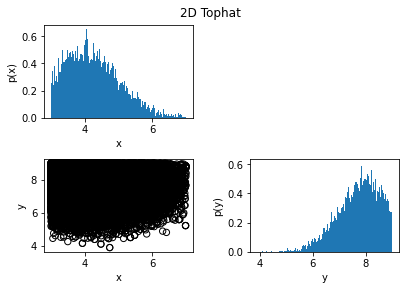

In [22]:
def tophat(sq):
    #print("sq", sq)
    x=sq[0]
    y=sq[1]
    if (3<x<7 and 1<y<9):
        return 1
    else:
        return 0

squarehat=tophat
MC2dhat = MH_MCMC_hat(squarehat, lambda x: stats.multivariate_normal.rvs(mean=np.array([4,8]), cov=np.array([[1,0],[0,1]])))
results2dhat = MC2dhat.sample(hops)

plots3(results2dhat, "2D Tophat")

## Problem 5
Problem 10: Re-do Problem 2 but now look at convergence: Plot the x chain as
a function of timestep. Also split the chain into four contiguous segments (the first,
second, third, and fourth quarters of the chain). In each of these four, compute the
empirical mean and empirical variance of x. What do you conclude about convergence
from these heuristics?

80000


Text(0, 0.5, 'x value')

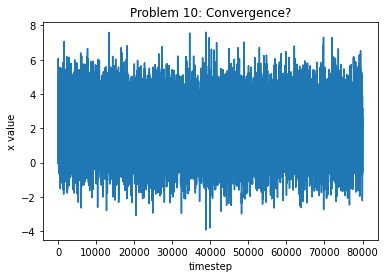

In [23]:


print(len(results))
plt.plot(results)

plt.title("Problem 10: Convergence?")
plt.xlabel('timestep')
plt.ylabel('x value')


In [24]:
dist1=results[0:19999]
dist2=results[20000:39999]
dist3=results[40000:59999]
dist4=results[60000:79999]

print("mean of four sections")
print("part 1:", np.mean(dist1),"part 2:", np.mean(dist2),"part 3:", np.mean(dist3),"part 4:", np.mean(dist4))
print("variance of four sections")
print("part 1:", np.var(dist1),"part 2:", np.var(dist2),"part 3:", np.var(dist3),"part 4:", np.var(dist4))

mean of four sections
part 1: 2.0411571670153252 part 2: 2.0137762455790895 part 3: 2.0072634358466273 part 4: 1.9982544263647117
variance of four sections
part 1: 1.9916160834805006 part 2: 1.9919908186339093 part 3: 2.0233928212798546 part 4: 1.9562822745126802


The variance shows a bit of a decrease, and the mean stays about the same. Overall, the x values do not seem to really converge.